# HW01_기계학습
### 2019741039_백홍하
---

## Decision Tree

In [309]:
# 최적 하이퍼파라미터 튜닝

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dtc = DecisionTreeClassifier()
cancer = load_breast_cancer()

parameters = {'max_depth': [3,4,5,6,7], 'min_samples_split': [4,6,8,10,12,14,16]}

max_depth_param = {depth: 0 for depth in parameters['max_depth']}
min_samples_split_param = {split: 0 for split in parameters['min_samples_split']}

for i in range(500):
    X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2)
    gs = GridSearchCV(dtc, param_grid=parameters, scoring='recall', cv=5, refit=True)
    gs.fit(X_train, y_train)

    print(f'[step{i+1}] best_params_ :', gs.best_params_, 'best_score_ :', gs.best_score_)

    for max_depth in parameters['max_depth']:
        if gs.best_params_['max_depth'] == max_depth:
            max_depth_param[max_depth] += 1

    for min_samples_split in parameters['min_samples_split']:
        if gs.best_params_['min_samples_split'] == min_samples_split:
            min_samples_split_param[min_samples_split] += 1

print(f'------------------------------[end]------------------------------')
print('max_depth 나온 횟수:', max_depth_param)
print('min_samples_split_depth 나온 횟수 :', min_samples_split_param)
print('best max_depth:', max(max_depth_param, key=max_depth_param.get))
print('best min_samples_split_depth:', max(min_samples_split_param, key=min_samples_split_param.get))

[step1] best_params_ : {'max_depth': 4, 'min_samples_split': 6} best_score_ : 0.9596610169491525
[step2] best_params_ : {'max_depth': 3, 'min_samples_split': 4} best_score_ : 0.9655172413793103
[step3] best_params_ : {'max_depth': 5, 'min_samples_split': 4} best_score_ : 0.9577694235588972
[step4] best_params_ : {'max_depth': 3, 'min_samples_split': 8} best_score_ : 0.9644736842105264
[step5] best_params_ : {'max_depth': 4, 'min_samples_split': 8} best_score_ : 0.9694330800701344
[step6] best_params_ : {'max_depth': 3, 'min_samples_split': 4} best_score_ : 0.9756805807622504
[step7] best_params_ : {'max_depth': 3, 'min_samples_split': 6} best_score_ : 0.9470551378446114
[step8] best_params_ : {'max_depth': 3, 'min_samples_split': 4} best_score_ : 0.9575187969924812
[step9] best_params_ : {'max_depth': 3, 'min_samples_split': 6} best_score_ : 0.9517241379310345
[step10] best_params_ : {'max_depth': 3, 'min_samples_split': 6} best_score_ : 0.9576441102756892
[step11] best_params_ : {'max

recall_score : 0.9871794871794872
accuracy_score: 0.9473684210526315
precision_score: 0.9390243902439024
f1_score: 0.9625
---------------------------------------------------------------------------


[Text(0.5, 0.875, 'worst area <= 868.2\ngini = 0.474\nsamples = 455\nvalue = [176, 279]\nclass = benign'),
 Text(0.25, 0.625, 'worst concave points <= 0.16\ngini = 0.164\nsamples = 299\nvalue = [27, 272]\nclass = benign'),
 Text(0.125, 0.375, 'worst concave points <= 0.132\ngini = 0.088\nsamples = 283\nvalue = [13, 270]\nclass = benign'),
 Text(0.0625, 0.125, 'gini = 0.031\nsamples = 256\nvalue = [4, 252]\nclass = benign'),
 Text(0.1875, 0.125, 'gini = 0.444\nsamples = 27\nvalue = [9, 18]\nclass = benign'),
 Text(0.375, 0.375, 'worst texture <= 24.605\ngini = 0.219\nsamples = 16\nvalue = [14, 2]\nclass = malignant'),
 Text(0.3125, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = benign'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]\nclass = malignant'),
 Text(0.75, 0.625, 'worst concavity <= 0.218\ngini = 0.086\nsamples = 156\nvalue = [149, 7]\nclass = malignant'),
 Text(0.625, 0.375, 'mean texture <= 19.86\ngini = 0.48\nsamples = 10\nvalue = [4, 6]\nclass

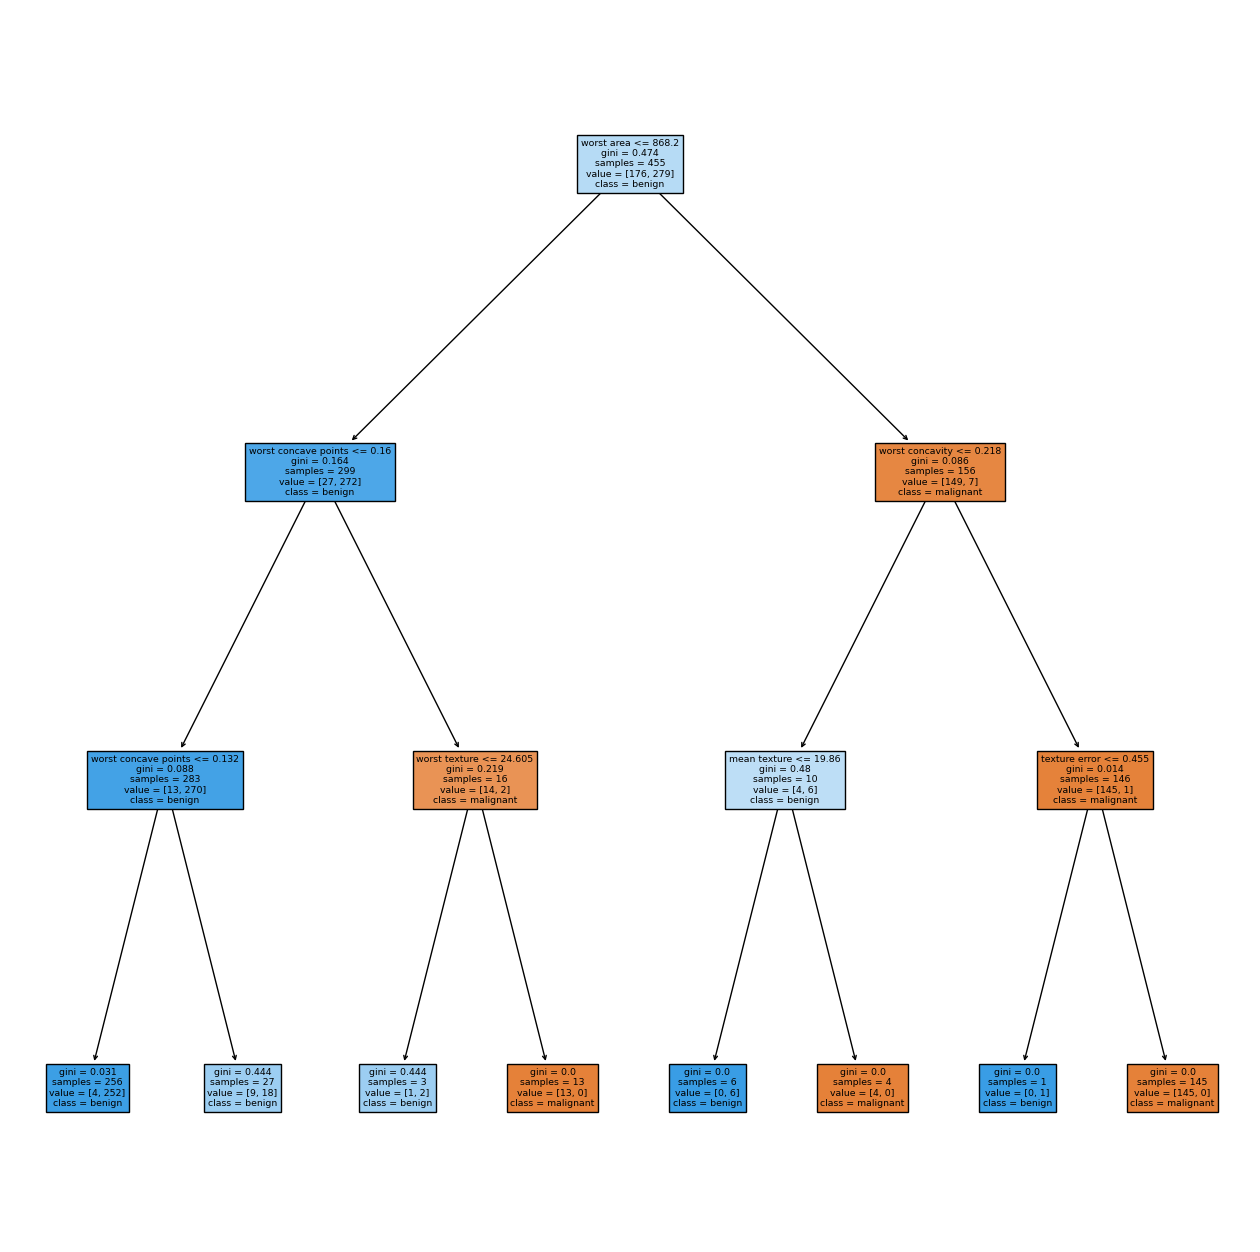

In [377]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2)
dtc = DecisionTreeClassifier(max_depth=3, min_samples_split=4)
dtc.fit(X_train, y_train)

y_hat = dtc.predict(X_test)
print('recall_score :', recall_score(y_test, y_hat))
print('accuracy_score:', accuracy_score(y_test, y_hat))
print('precision_score:', precision_score(y_test, y_hat))
print('f1_score:', f1_score(y_test, y_hat))
print('---------------------------------------------------------------------------')
plt.figure(figsize=(16,16))
tree.plot_tree(dtc, feature_names=cancer.feature_names, class_names=cancer.target_names, filled=True)